In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
afl_df = pd.read_csv("aflstats/stats.csv")

In [3]:
afl_df.head()

Team        Player       D.O.B  Height  Weight  Position  Season Round  \
0  Adelaide  Atkins, Rory  1994-07-12     186      85  Midfield    2018    R1   
1  Adelaide  Betts, Eddie  1986-11-26     174      74   Forward    2018    R1   
2  Adelaide   Brown, Luke  1992-09-22     181      81  Defender    2018    R1   
3  Adelaide  Crouch, Matt  1995-04-21     182      80  Midfield    2018    R1   
4  Adelaide   Doedee, Tom  1997-03-01     188      88  Defender    2018    R1   

         Date  Score      ...        FreesAgainst BrownlowVotes  \
0  2018-03-23   87.0      ...                   0             0   
1  2018-03-23   87.0      ...                   0             0   
2  2018-03-23   87.0      ...                   0             0   
3  2018-03-23   87.0      ...                   1             0   
4  2018-03-23   87.0      ...                   0             0   

  ContendedPossessions UncontendedPossessions  ContestedMarks  MarksInside50  \
0                    4                      9               0              0   
1                    6                      9               0              1   
2                    1                     10               0              0   
3                   11                     31               0              0   
4                    8                     14               0              0   

   OnePercenters  Bounces  GoalAssists  PercentPlayed  
0              0        0            1             86  
1              3        0            1             85  
2              2        0            0             82  
3              0        0            1             80  
4              9        1            0             93  

[5 rows x 37 columns]

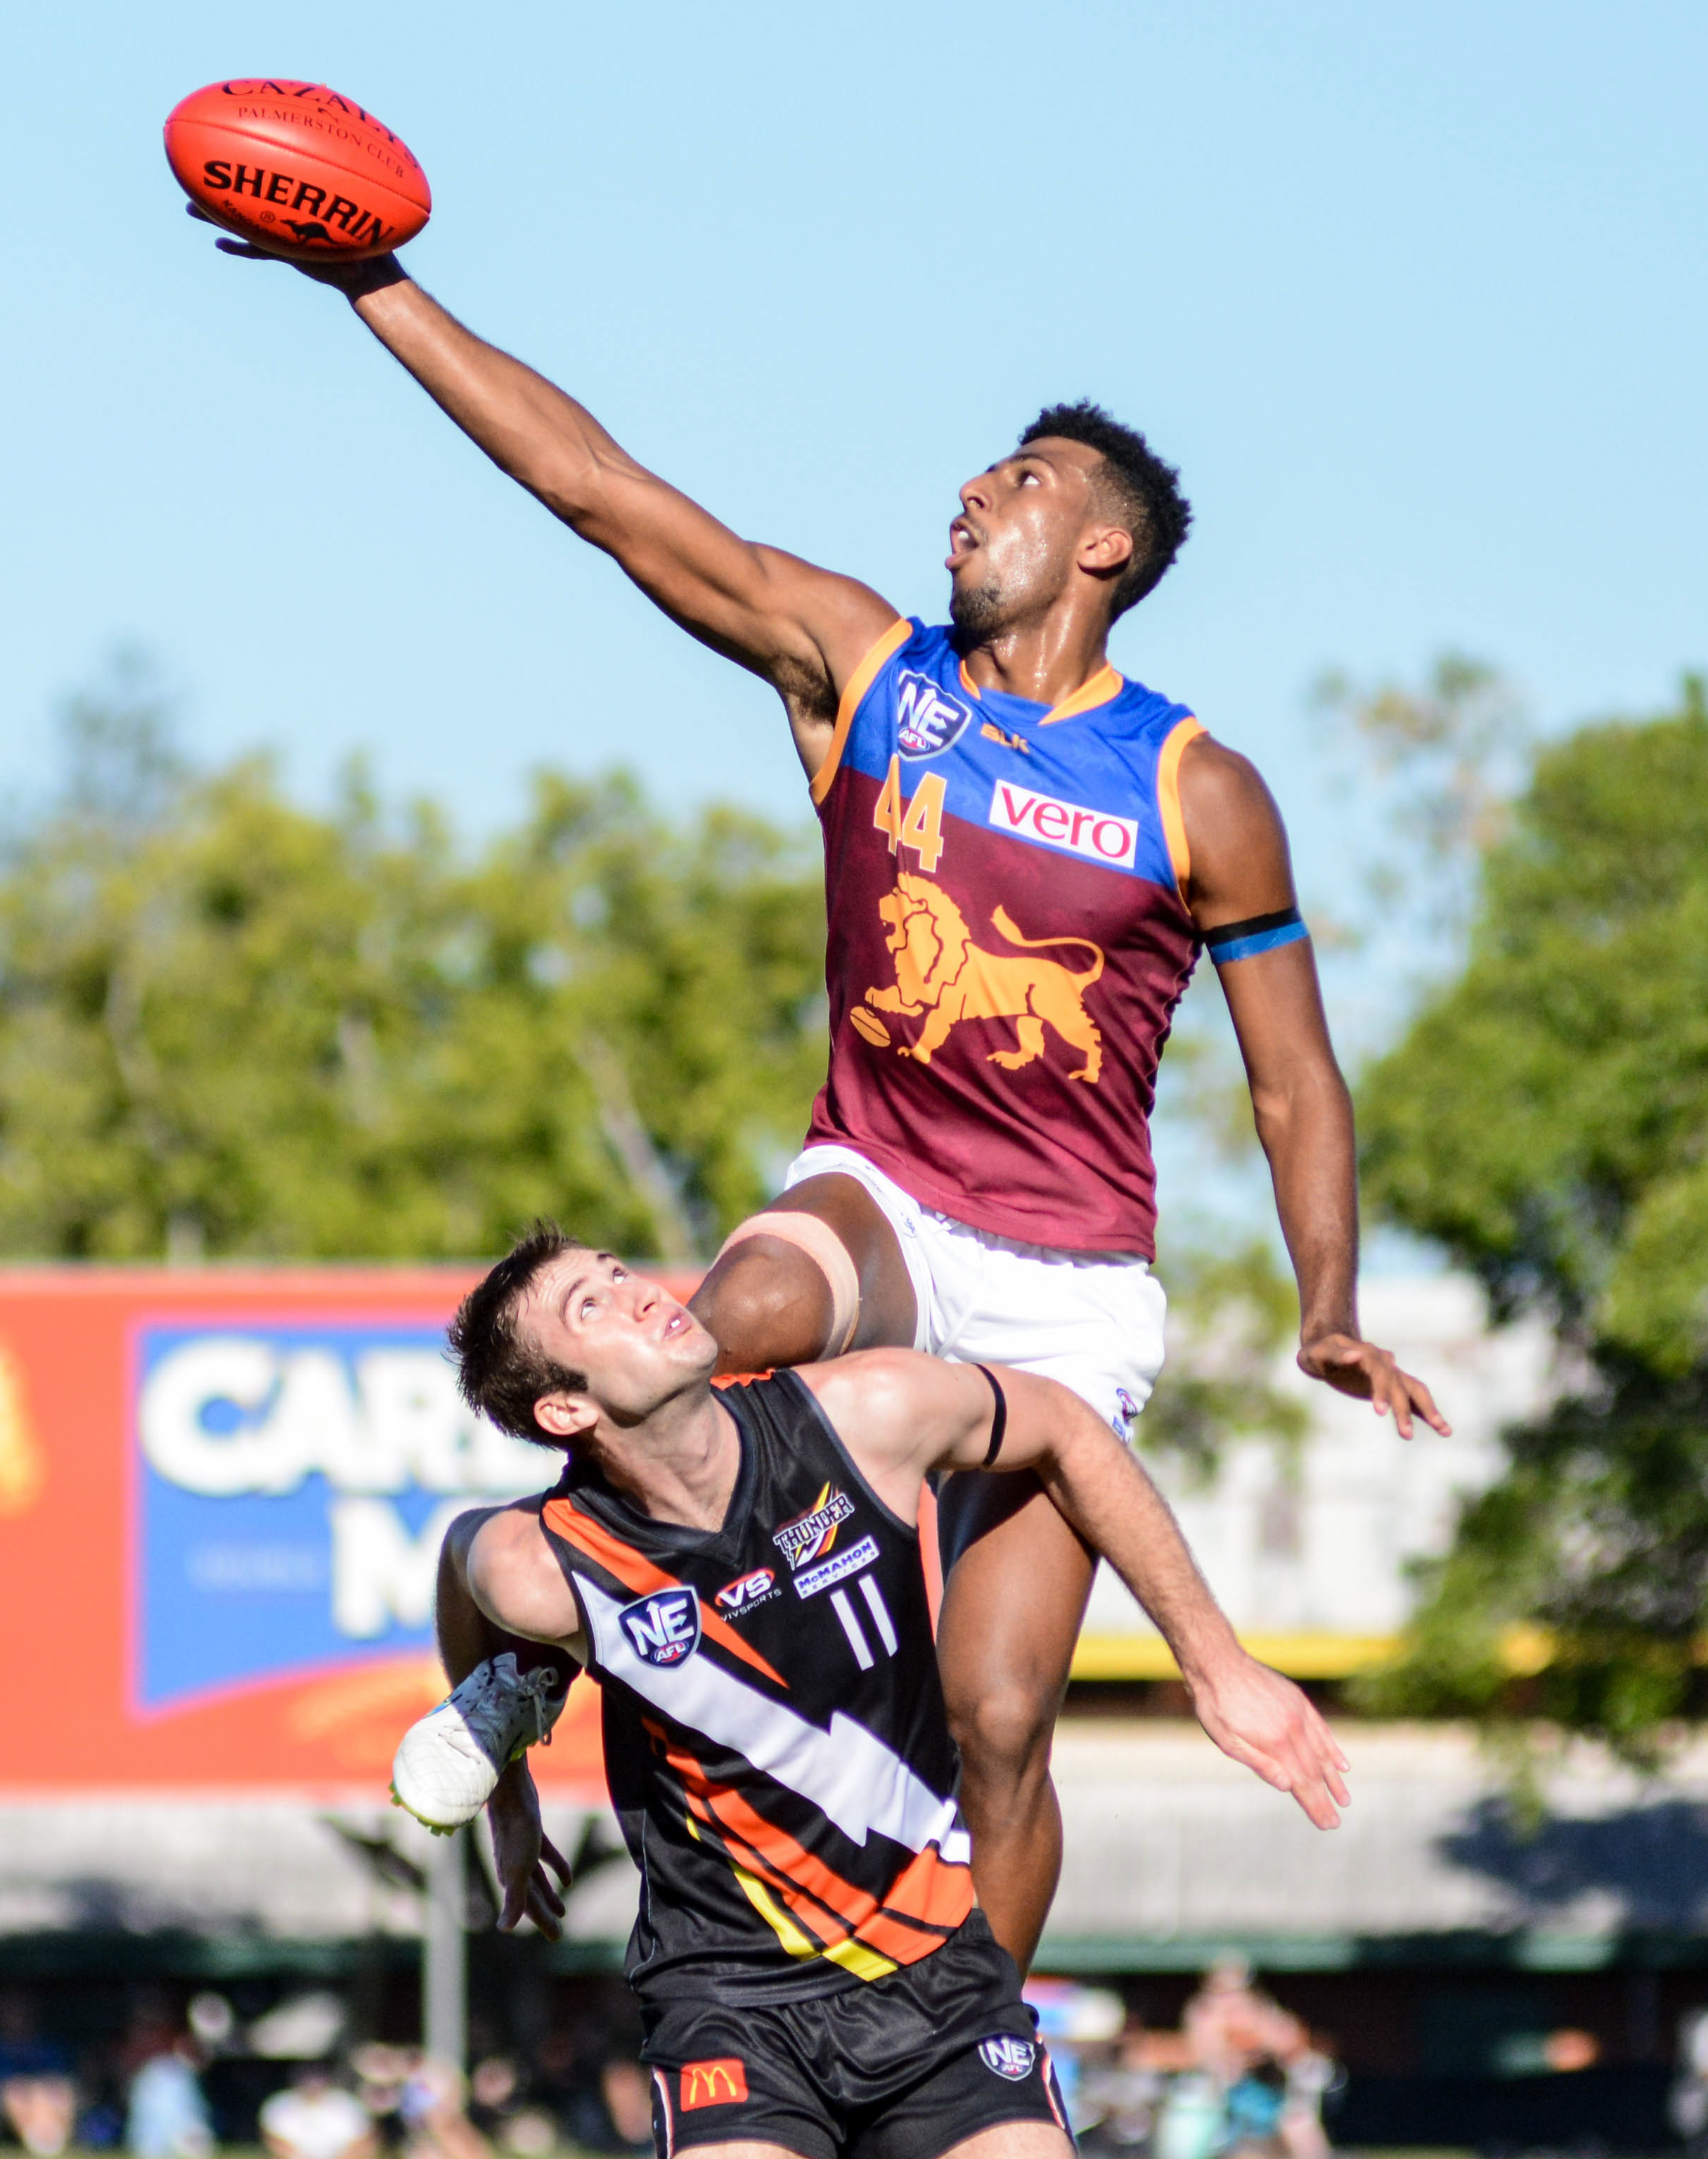

In [4]:
Image(filename='images/ladder.jpg')

# Helper Function

In [5]:
afl_df.Team.unique()

array(['Adelaide', 'Brisbane Lions', 'Carlton', 'Collingwood', 'Essendon',
       'Fremantle', 'Geelong', 'Gold Coast', 'Greater Western Sydney',
       'Hawthorn', 'Melbourne', 'North Melbourne', 'Port Adelaide',
       'Richmond', 'St Kilda', 'Sydney', 'West Coast', 'Western Bulldogs'],
      dtype=object)

In [6]:
# Based on team return the location of the map
def get_regions(df): #define the "is_in_mobile" function, which accepts an argument called "platform"
    region = []
    for team in df.Team:
        if team == ('Adelaide'):
            region.append("SC")
        elif team == ('Brisbane Lions'):
            region.append("NE")
        elif team == ('Carlton'):
            region.append("S")
        elif team == ('Collingwood'):
            region.append("S")
        elif team == ('Essendon'):
            region.append("S")
        elif team == ('Fremantle'):
            region.append("SW")
        elif team == ('Geelong'):
            region.append("S")
        elif team == ('Gold Coast'):
            region.append("NE")
        elif team == ('Greater Western Sydney'):
            region.append("SE")
        elif team == ('Hawthorn'):
            region.append("S")
        elif team == ('Melbourne'):
            region.append("S")
        elif team == ('North Melbourne'):
            region.append("S")
        elif team == ('Port Adelaide'):
            region.append("SC")
        elif team == ('Richmond'):
            region.append("S")
        elif team == ('St Kilda'):
            region.append("S")
        elif team == ('Sydney'):
            region.append("SE")
        elif team == ('West Coast'):
            region.append("SW")
        elif team == ('Western Bulldogs'):
            region.append("S")
    return region

### Part 3 Helper methods

In [7]:
# Populate colms for location of team
def parse_age(df): #define the "is_in_mobile" function, which accepts an argument called "platform"
    ages = []
    for string_dob in df['D.O.B']:
        array_dob = string_dob.split('-')
        ages.append(int(array_dob[0]))
    return ages

In [8]:
# Populate colms for location of team
def get_current_age(df,birth_year): #define the "is_in_mobile" function, which accepts an argument called "platform"
    current_age = []
    index = 0
    for season in df.Season:
        current_age.append(season - birth_year[index])
        index += 1
    return current_age

# Part 1; Analysis of Team .v.s. Player Performance

In [ ]:
# Add image 

In [9]:
part_1 = afl_df
# Possibly use bokeh here

In [10]:
# Group by team

In [11]:
# Find the difference between the stats and other things

# Part 2

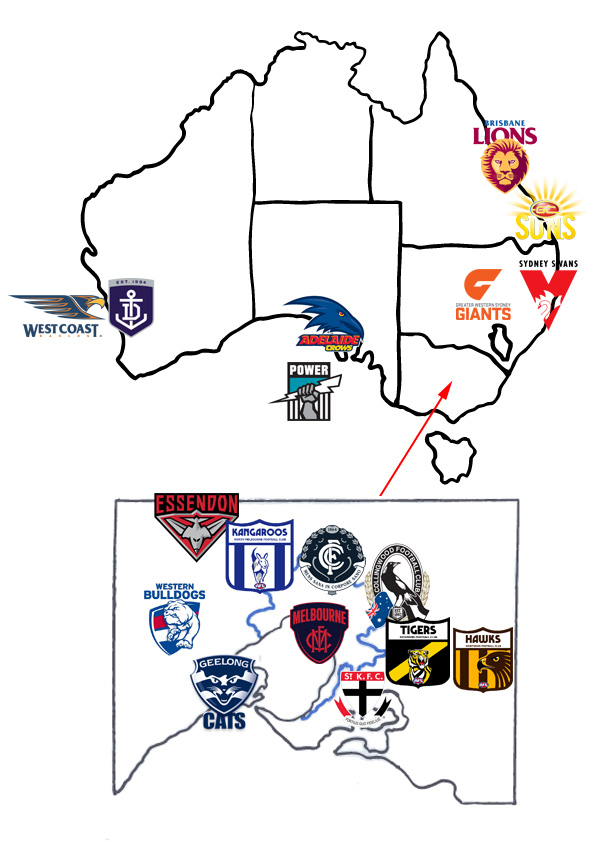

In [12]:
Image(filename='images/map.jpg')

In [13]:
part_2 = afl_df
temp = get_regions(part_2)
len(temp)
part_2['region']=temp # Adding it to the array

In [14]:
# TODO place table here

In [15]:
# Compare Score to to Region illustrate in table

In [16]:
# Find the relationship between the two to see if there is one

In [17]:
# Compare this to the other data to see if it holds true

# Part 3; Comparisson of Positions and Player Stats

In [ ]:
# Add image 

In [18]:
part_3 = afl_df

In [19]:
player_stats = part_3[part_3.columns[2:7]]
percent_game_played = part_3['PercentPlayed']
concat_df = pd.concat([player_stats,percent_game_played], axis=1)

In [20]:
birth_year=parse_age(concat_df) # Adding it to the array
current_age = get_current_age(concat_df,birth_year)
concat_df['current_age']=current_age # Adding it to the array

In [21]:
concat_df = concat_df.drop(columns=["D.O.B"])

In [22]:
concat_df["Position"] = concat_df["Position"].astype('category')
concat_df["Season"] = concat_df["Season"].astype('category')
concat_df.dtypes

Height              int64
Weight              int64
Position         category
Season           category
PercentPlayed       int64
current_age         int64
dtype: object

In [23]:
afl_df.Position.unique() # List of teams in the league

array(['Midfield', 'Forward', 'Defender', 'Midfield, Forward', 'Ruck',
       'Defender, Forward', 'Forward, Ruck', 'Defender, Midfield',
       'Midfield, Ruck'], dtype=object)

In [24]:
concat_df_2 = concat_df.loc[afl_df['Season'].isin(['2012','2013','2014'])] # Obtaining the data for year

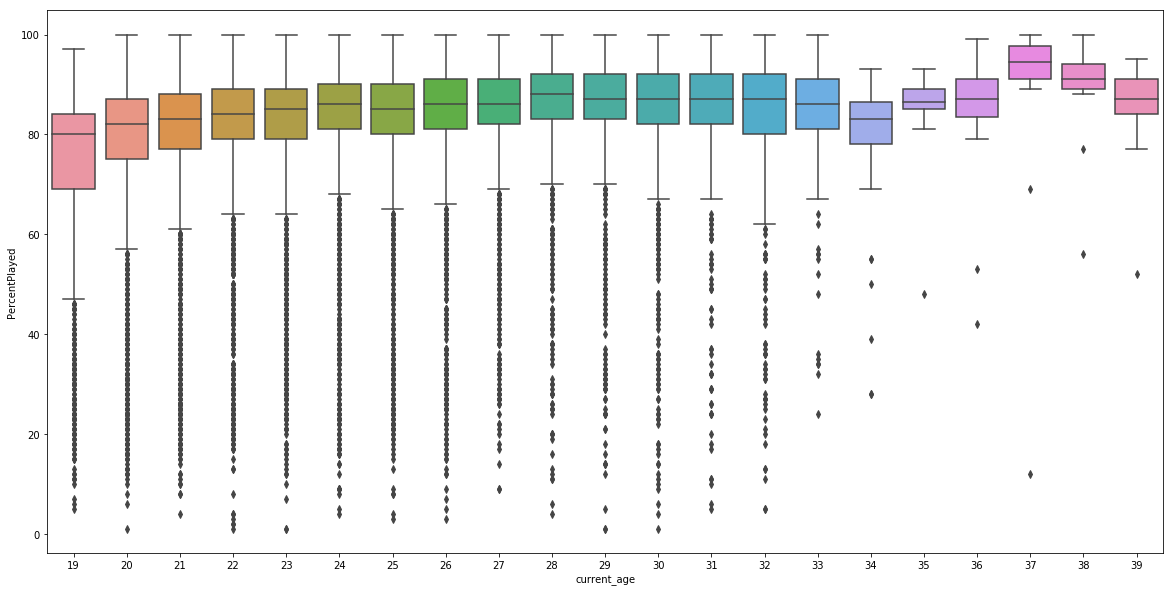

In [25]:
plt.figure(figsize=(20, 10))
# ax = sns.swarmplot(x="current_age", y="PercentPlayed", data=(concat_df), color=".25")
ax = sns.boxplot(x="current_age", y="PercentPlayed", data=(concat_df_2))
# TODO RESIZE THE PLOT

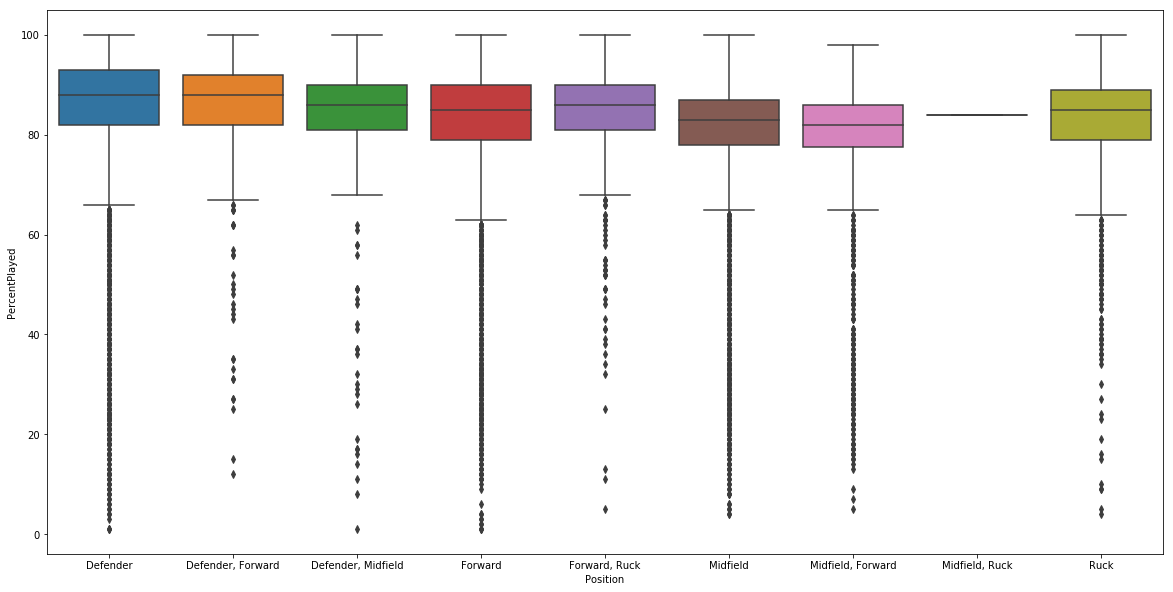

In [26]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="Position", y="PercentPlayed", data=(concat_df_2))
# TODO RESIZE THE PLOT

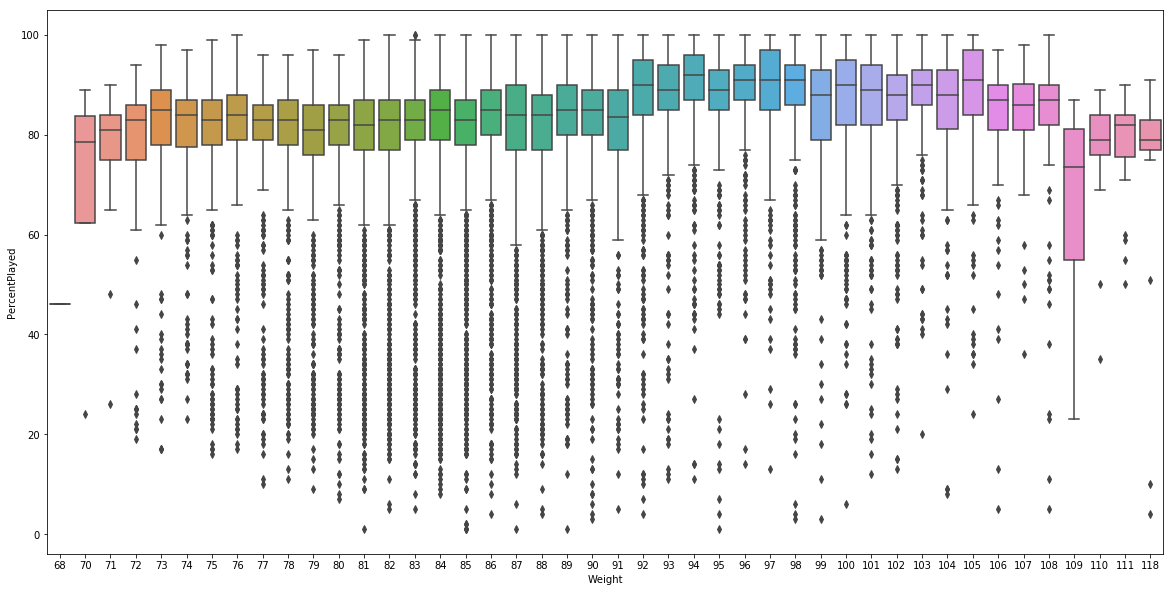

In [27]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="Weight", y="PercentPlayed", data=(concat_df_2))
# TODO RESIZE THE PLOT

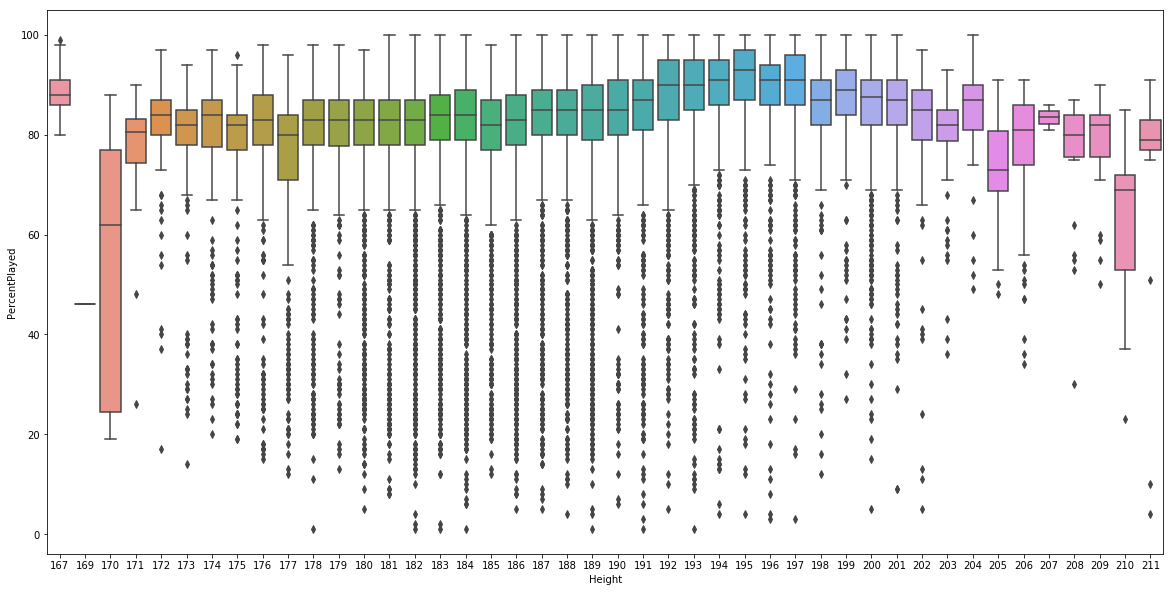

In [28]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="Height", y="PercentPlayed", data=(concat_df_2))
# TODO RESIZE THE PLOT

## Data for Specific Positions

In [ ]:
# Add image 

In [29]:
# Listing all positions
concat_df_2.Position.unique() # List of teams in the league

[Forward, Defender, Midfield, Midfield, Forward, Ruck, Defender, Forward, Defender, Midfield, Forward, Ruck, Midfield, Ruck]
Categories (9, object): [Forward, Defender, Midfield, Midfield, Forward, ..., Defender, Forward, Defender, Midfield, Forward, Ruck, Midfield, Ruck]

In [30]:
forward_df = concat_df.loc[afl_df['Position'].isin(['Forward'])] # Obtaining the data for year
defender_df = concat_df.loc[afl_df['Position'].isin(['Defender'])] # Obtaining the data for year
midfield_df = concat_df.loc[afl_df['Position'].isin(['Midfield'])] # Obtaining the data for year
ruck_df = concat_df.loc[afl_df['Position'].isin(['Ruck'])] # Obtaining the data for year


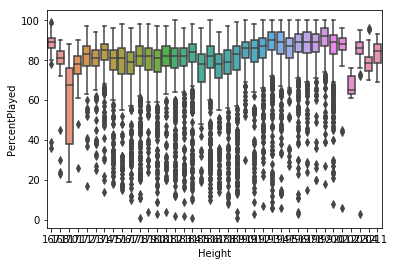

In [31]:
ax = sns.boxplot(x="Height", y="PercentPlayed", data=(forward_df))

In [32]:
# Add the heights and weiht percent played for each of the 4 positions

In [33]:
plt.show()

In [34]:
print("HI")

HI
